<h1 style="color:pink;">Introduction</h1>

 In this classification project, the dataset [diabetes_012_health_indicators_BRFSS2015.csv](https://www.kaggle.com/datasets) is utilized, which contains 253,680 clean survey responses from the CDC's 2015 Behavioral Risk Factor Surveillance System (BRFSS).

The target variable, Diabetes_012, consists of three classes:

0: No diabetes or only during pregnancy  
1: Prediabetes  
2: Diabetes

Additionally, the dataset comprises 22 feature variables. Several steps will be followed to select and optimize models for high performance and accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Shows the first 5 rows to get a quick look at the data
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Show basic statistics (mean, min, max, etc.) for each column
data.describe()



,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
# Print the initial shape of the dataset (rows and columns count)
print("Initial shape of the dataframe:", data.shape)

Initial shape of the dataframe: (253680, 22)


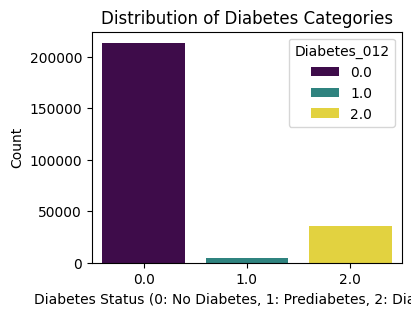

In [6]:
# Created a bar plot to visualize the distribution of diabetes categories in the dataset
plt.figure(figsize=(4, 3))
sns.countplot(x=data["Diabetes_012"], hue=data["Diabetes_012"], palette="viridis")
plt.title("Distribution of Diabetes Categories")
plt.xlabel("Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")
plt.ylabel("Count")
plt.show()

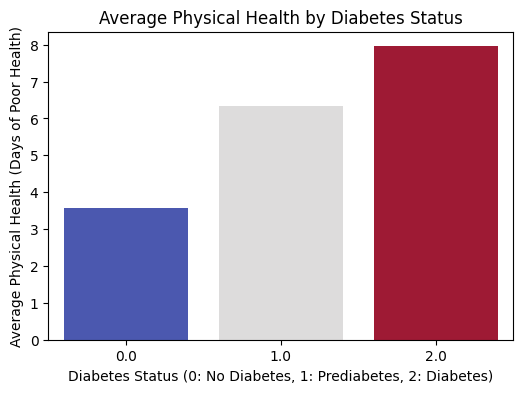

In [6]:
# Created a bar plot that shows the average number of poor physical health days for each diabetes class
avg_phys_health = data.groupby("Diabetes_012")["PhysHlth"].mean()
plt.figure(figsize=(6, 4))
sns.barplot(
    x=avg_phys_health.index,
    y=avg_phys_health.values,
    palette="coolwarm",
    hue=avg_phys_health.index,
    dodge=False,
    legend=False  # Disables automatic legend for hue
)
plt.title("Average Physical Health by Diabetes Status")
plt.xlabel("Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")
plt.ylabel("Average Physical Health (Days of Poor Health)")
plt.show()

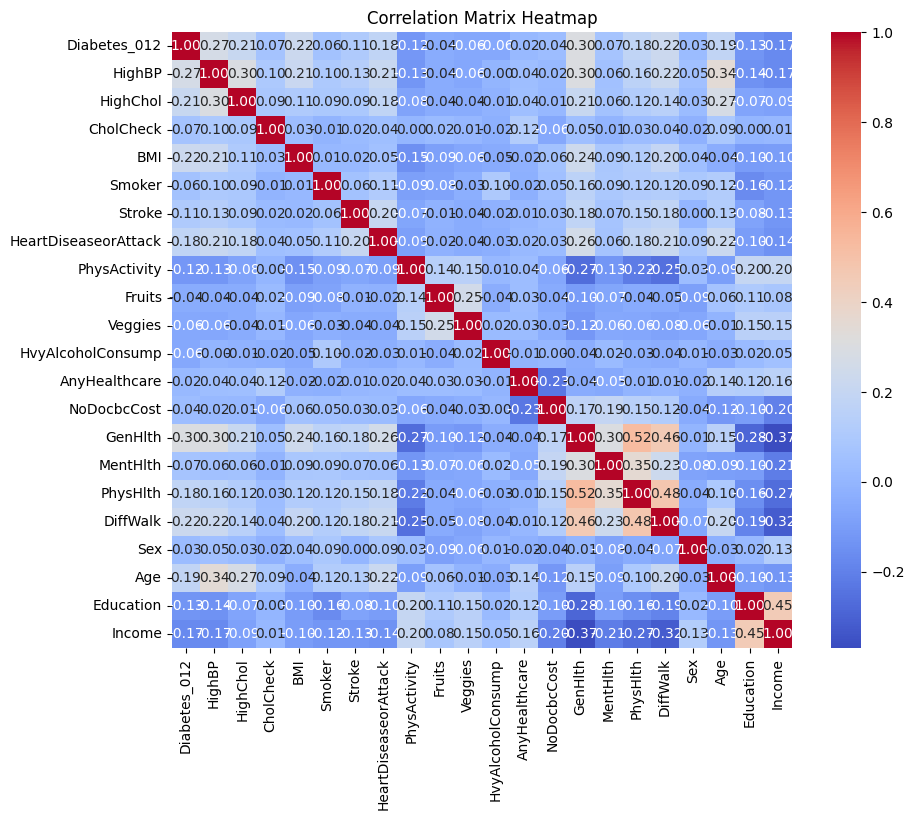

In [8]:
# Created a Heatmap to visualize correlations between all features in the dataset
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


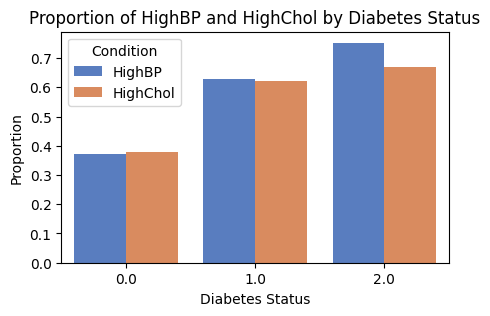

In [9]:
# Created a bar plot of HighBP and HighChol by Diabetes Status
plt.figure(figsize=(5, 3))

# Group the dataset by 'Diabetes_012' and calculate mean values for 'HighBP' and 'HighChol'
highbp_chol = data.groupby("Diabetes_012")[["HighBP", "HighChol"]].mean().reset_index()

# Melt the data so that 'HighBP' and 'HighChol' are in the same column for easier plotting
highbp_chol_melted = highbp_chol.melt(id_vars=["Diabetes_012"], value_vars=["HighBP", "HighChol"], 
                                      var_name="Condition", value_name="Proportion")

sns.barplot(data=highbp_chol_melted, x="Diabetes_012", y="Proportion", hue="Condition", palette="muted")
plt.title("Proportion of HighBP and HighChol by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Proportion")
plt.legend(title="Condition")
plt.show()


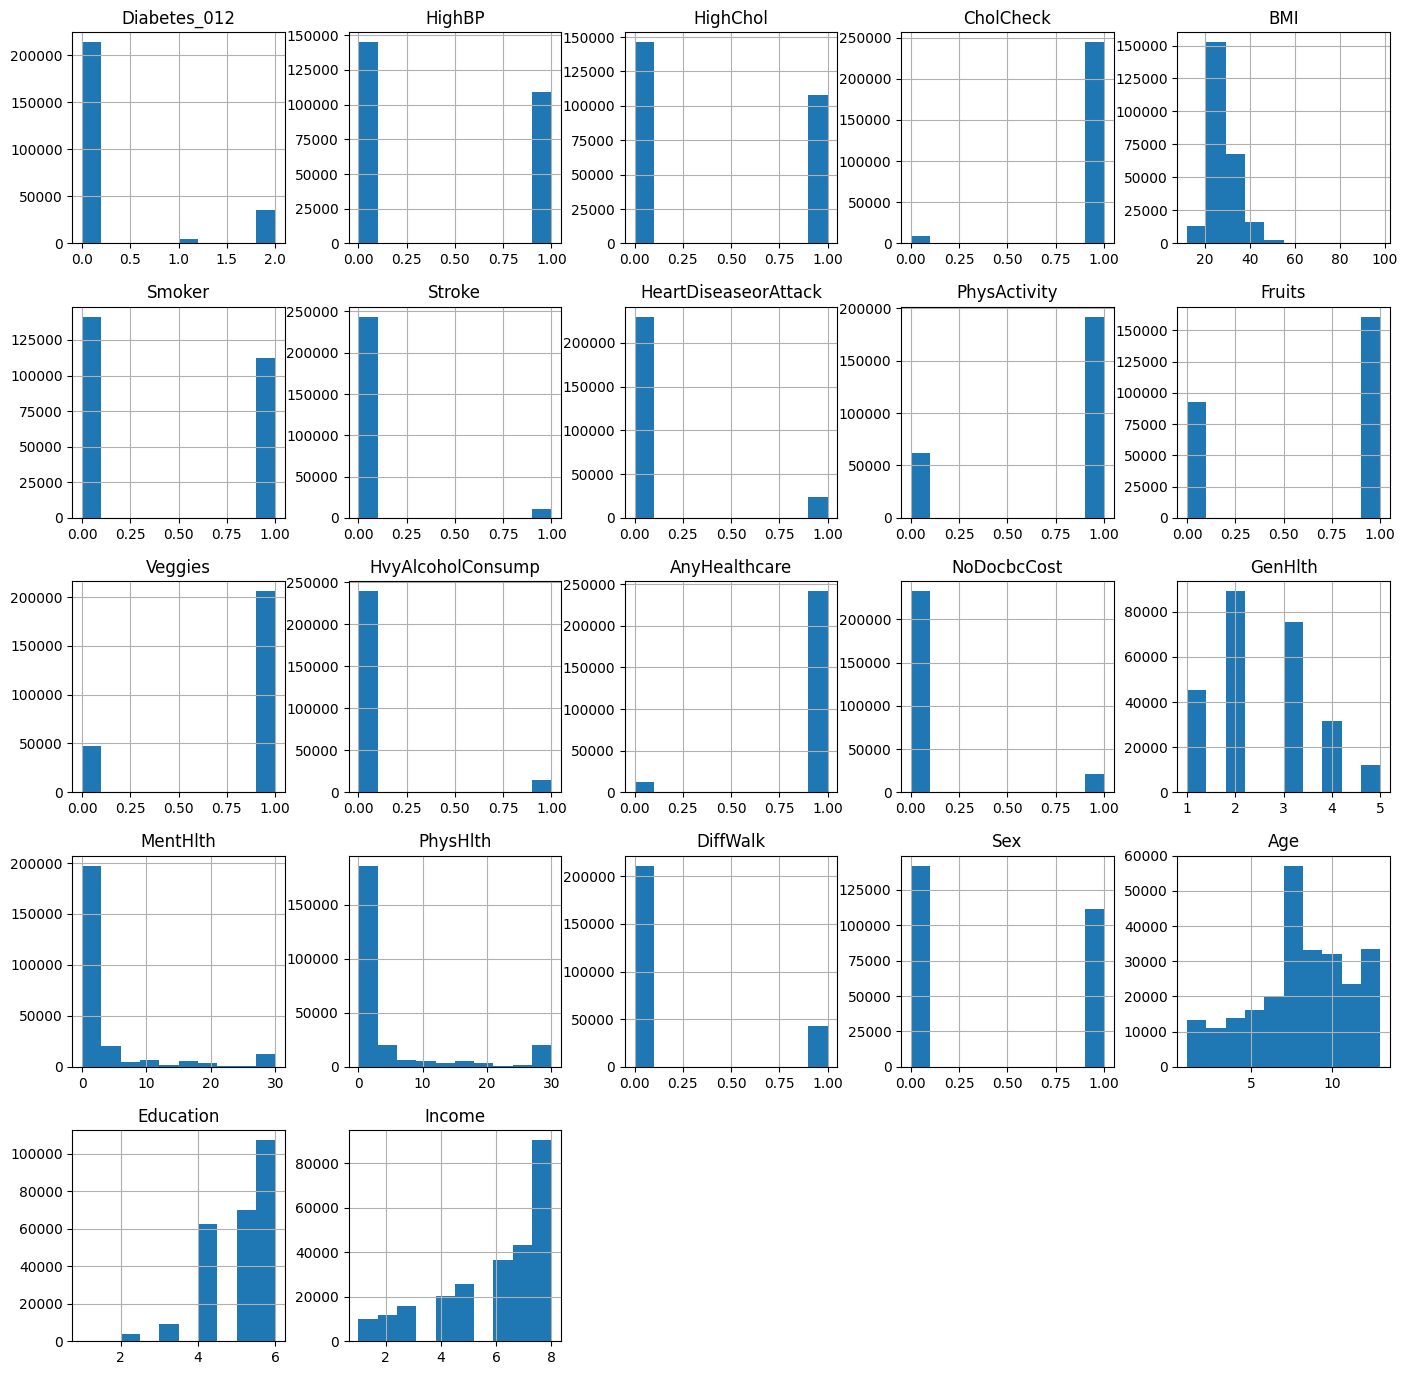

In [10]:
# Created a Histogram to visualize the distribution of all attributes in the dataset
data.hist(figsize = (17, 17))  
plt.show() 

In [11]:
# Check for missing values in each column and print a summary
print("Missing values per column:\n", data.isnull().sum())
if data.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")


Missing values per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
No missing values found in the dataset.


In [12]:
# A function to remove outliers using the IQR method
def remove_outliers(data, column):
   
    # Calculate the first quartile (Q1) and third quartile (Q3) of the data
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return the data where values are within the defined bounds
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the remove_outliers function on the 'BMI' column of the data
data = remove_outliers(data, 'BMI')

# Check the shape of the data after removing outliers
print("Shape of the data after removing outliers in 'BMI':", data.shape)


Shape of the data after removing outliers in 'BMI': (243833, 22)


In [13]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features using StandardScaler
scaler = StandardScaler()

# Define the numeric features to scale
numeric_features = ["BMI", "MentHlth", "PhysHlth", "Age"] 

# Apply scaling to the numeric features
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [14]:
from imblearn.over_sampling import SMOTE
# Separate Features and Target
X = data.drop("Diabetes_012", axis=1)  # Features
y = data["Diabetes_012"]  # Target

# Apply SMOTE to Balance the Classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())

Class distribution after SMOTE: Diabetes_012
0.0    207514
2.0    207514
1.0    207514
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display shapes of splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (435779, 21)
Validation set shape: (93381, 21)
Test set shape: (93382, 21)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the parameter grid
param_grid_dt = {
    'criterion': ['entropy'],   # Splitting criteria
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [10, 20, 30],   # Minimum samples required to split
    'min_samples_leaf': [1, 5, 10]      # Minimum samples required at leaf
}

# Perform GridSearchCV
grid_dt = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_dt.fit(X_train, y_train)

# Best parameters and validation accuracy
best_dt = grid_dt.best_estimator_
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best Cross-Validated Accuracy for Decision Tree:", grid_dt.best_score_)

# Evaluate the tuned Decision Tree on the test set
y_pred_dt_tuned = best_dt.predict(X_test)
print("\nClassification Report for Tuned Decision Tree:")
print(classification_report(y_test, y_pred_dt_tuned))
print("Confusion Matrix for Tuned Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt_tuned))
print(f"Accuracy of Tuned Decision Tree: {accuracy_score(y_test, y_pred_dt_tuned):.2f}")


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validated Accuracy for Decision Tree: 0.8426243530483173

Classification Report for Tuned Decision Tree:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     31095
         1.0       0.89      0.91      0.90     31016
         2.0       0.83      0.77      0.80     31271

    accuracy                           0.86     93382
   macro avg       0.86      0.86      0.86     93382
weighted avg       0.86      0.86      0.86     93382

Confusion Matrix for Tuned Decision Tree:
[[27709   318  3068]
 [  672 28366  1978]
 [ 4008  3099 24164]]
Accuracy of Tuned Decision Tree: 0.86


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100],       # Number of trees
    'max_features': ['sqrt'],            # Maximum features for splitting
    'max_samples': [0.5, 0.75, None],    # Proportion of samples used per tree (None = full dataset)
}

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid_rf,
    n_iter=8,            
    cv=3,                
    scoring='accuracy',  
    n_jobs=-1,    
)
random_search_rf.fit(X_train, y_train)

# Best parameters and validation accuracy
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Cross-Validated Accuracy for Random Forest:", random_search_rf.best_score_)

# Evaluate the tuned Random Forest on the test set
y_pred_rf_tuned = best_rf.predict(X_test)
print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_rf_tuned))
print("Confusion Matrix for Tuned Random Forest:")
print(confusion_matrix(y_test, y_pred_rf_tuned))
print(f"Accuracy of Tuned Random Forest: {accuracy_score(y_test, y_pred_rf_tuned):.2f}")


Best Parameters for Random Forest: {'n_estimators': 100, 'max_samples': None, 'max_features': 'sqrt'}
Best Cross-Validated Accuracy for Random Forest: 0.9234566136174643

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     31095
         1.0       0.98      0.98      0.98     31016
         2.0       0.92      0.90      0.91     31271

    accuracy                           0.94     93382
   macro avg       0.94      0.94      0.94     93382
weighted avg       0.94      0.94      0.94     93382

Confusion Matrix for Tuned Random Forest:
[[28867    59  2169]
 [  489 30279   248]
 [ 2682   409 28180]]
Accuracy of Tuned Random Forest: 0.94


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7],        # Number of neighbors
    'weights': ['uniform', 'distance'], # Weighting function
    'metric': ['euclidean']  # Distance metric
}

# Perform GridSearchCV
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_knn.fit(X_train, y_train)

# Best parameters and validation accuracy
best_knn = grid_knn.best_estimator_
print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best Cross-Validated Accuracy for KNN:", grid_knn.best_score_)

# Evaluate the tuned KNN on the test set
y_pred_knn_tuned = best_knn.predict(X_test)
print("\nClassification Report for Tuned KNN:")
print(classification_report(y_test, y_pred_knn_tuned))
print("Confusion Matrix for Tuned KNN:")
print(confusion_matrix(y_test, y_pred_knn_tuned))
print(f"Accuracy of Tuned KNN: {accuracy_score(y_test, y_pred_knn_tuned):.2f}")


Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validated Accuracy for KNN: 0.8832894663982515

Classification Report for Tuned KNN:
              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82     31095
         1.0       0.93      0.99      0.96     31016
         2.0       0.82      0.97      0.89     31271

    accuracy                           0.89     93382
   macro avg       0.90      0.89      0.89     93382
weighted avg       0.90      0.89      0.89     93382

Confusion Matrix for Tuned KNN:
[[22484  2022  6589]
 [  147 30796    73]
 [  904   190 30177]]
Accuracy of Tuned KNN: 0.89



--- Decision Tree ---
Accuracy: 0.8592555310445268
Precision: 0.8583281487207886
Recall: 0.8592555310445268
F1 Score: 0.8583151686659196


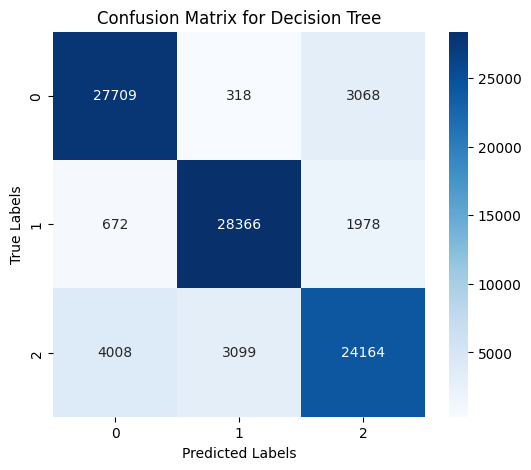


--- Random Forest ---
Accuracy: 0.9351481013471546
Precision: 0.935533590133227
Recall: 0.9351481013471546
F1 Score: 0.9352305053770509


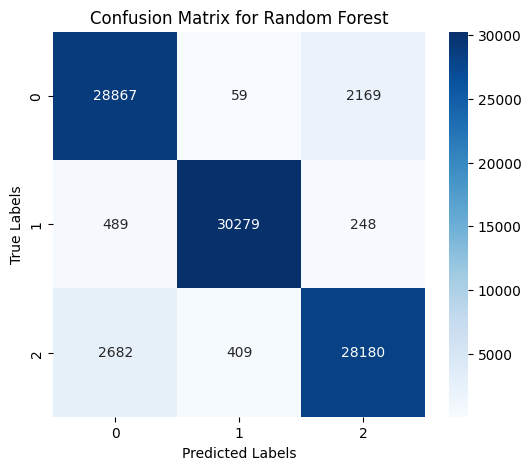


--- KNN ---
Accuracy: 0.8937161337302693
Precision: 0.9023131688088984
Recall: 0.8937161337302693
F1 Score: 0.890357032157289


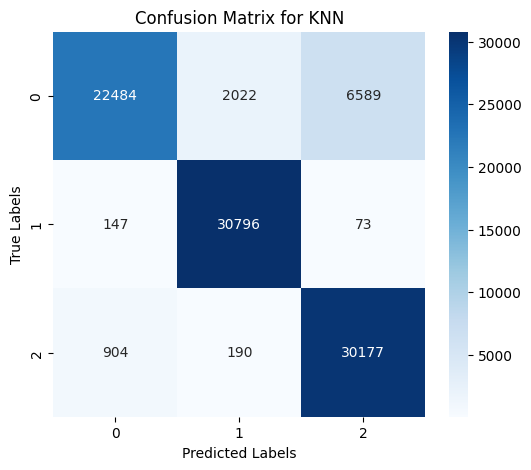


Best Performing Model: Random Forest
Accuracy: 0.9351481013471546


In [ ]:
# Import necessary libraries for metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.title(f"Confusion Matrix for {title}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Store results for each model
model_results = {}

# Decision Tree
y_pred_dt_tuned = best_dt.predict(X_test)
model_results["Decision Tree"] = {
    "Accuracy": accuracy_score(y_test, y_pred_dt_tuned),
    "Precision": precision_score(y_test, y_pred_dt_tuned, average="weighted"),
    "Recall": recall_score(y_test, y_pred_dt_tuned, average="weighted"),
    "F1 Score": f1_score(y_test, y_pred_dt_tuned, average="weighted"),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_dt_tuned)
}

# Random Forest
y_pred_rf_tuned = best_rf.predict(X_test)
model_results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf_tuned),
    "Precision": precision_score(y_test, y_pred_rf_tuned, average="weighted"),
    "Recall": recall_score(y_test, y_pred_rf_tuned, average="weighted"),
    "F1 Score": f1_score(y_test, y_pred_rf_tuned, average="weighted"),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf_tuned)
}

# K-Nearest Neighbors (KNN)
y_pred_knn_tuned = best_knn.predict(X_test)
model_results["KNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn_tuned),
    "Precision": precision_score(y_test, y_pred_knn_tuned, average="weighted"),
    "Recall": recall_score(y_test, y_pred_knn_tuned, average="weighted"),
    "F1 Score": f1_score(y_test, y_pred_knn_tuned, average="weighted"),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_knn_tuned)
}

# Print results and plot confusion matrices for all models
for model_name, metrics in model_results.items():
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    
    # Plot confusion matrix
    plot_confusion_matrix(metrics["Confusion Matrix"], model_name)

# Determine the best-performing model based on accuracy
best_model = max(model_results.items(), key=lambda x: x[1]["Accuracy"])
best_model_name = best_model[0]
best_model_accuracy = best_model[1]["Accuracy"]

# Print the best-performing model
print(f"\nBest Performing Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy}")


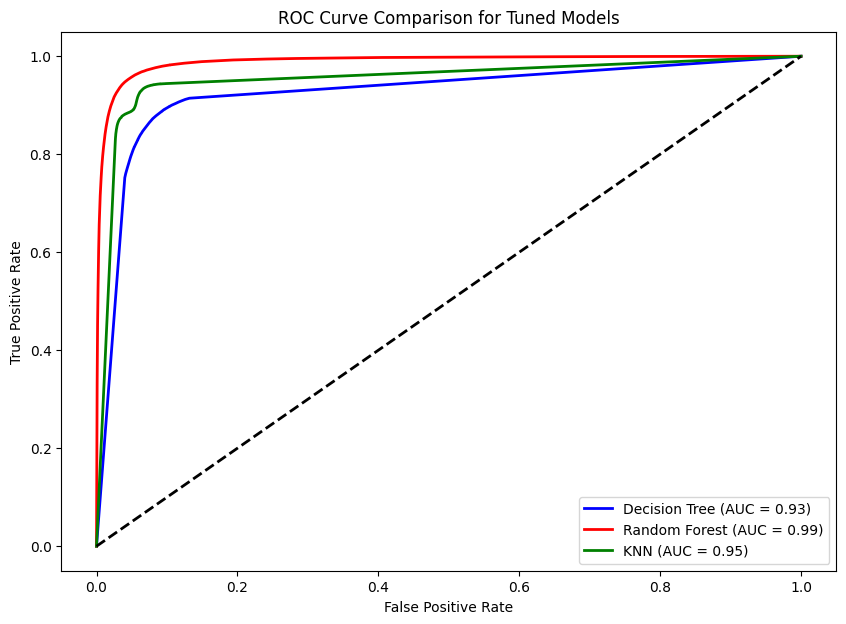

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

models = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "KNN": best_knn,
}

# Define colors for models
colors = ['blue', 'red', 'green',]

# Binarize y_test manually (assuming 3 classes: 0, 1, 2)
y_test_binarized = np.zeros((len(y_test), 3))
for i, label in enumerate(y_test):
    y_test_binarized[i, int(label)] = 1

# Plot ROC curves
plt.figure(figsize=(10, 7))

for (model_name, model), color in zip(models.items(), colors):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        
        # Compute ROC curve and AUC for each class
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(y_test_binarized.shape[1]):  # Loop through each class
            fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Micro-average ROC curve and AUC
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot micro-average ROC curve
        plt.plot(fpr["micro"], tpr["micro"], lw=2, color=color,
                 label=f'{model_name} (AUC = {roc_auc["micro"]:.2f})')

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve Comparison for Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
